# From LiveCoinWatch

- API from [LiveCoinWatch](https://www.livecoinwatch.com/tools/api)
- used Twitter Acc
- Documentation [GitHub](https://github.com/reneleogp/pylivecoinwatch)
- max. 10k requests 

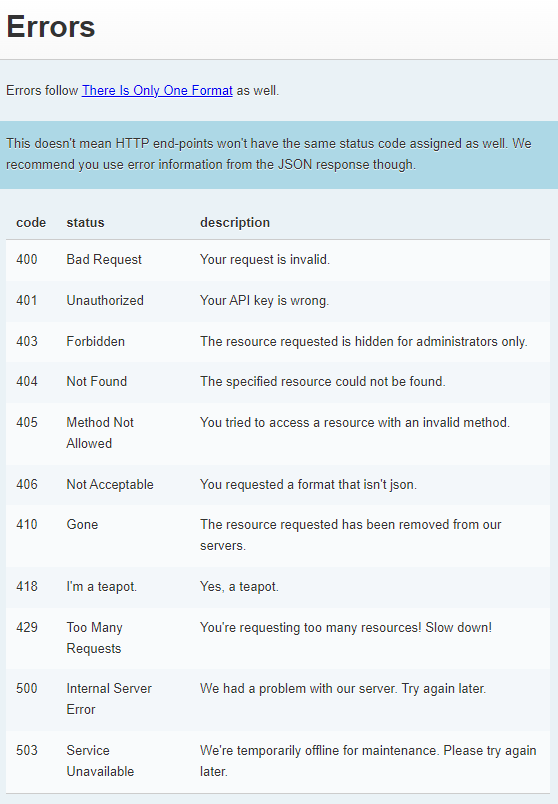

In [ ]:
!pip install pylivecoinwatch
from google.colab import drive
drive.mount('/content/gdrive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive


In [ ]:
import requests
import json
import pandas as pd
from google.colab import drive
import pandas as pd
from pylivecoinwatch import LiveCoinWatchAPI
import time
from datetime import datetime

url = "https://api.livecoinwatch.com/credits"
payload={}
headers = {
  'content-type': 'application/json',
  'x-api-key': '34fb0408-7a47-4c02-9420-d6317f6edb39'
}

response = requests.request("POST", url, headers=headers, data=payload)

dailyCreditsRemaining = int(response.json()['dailyCreditsRemaining'])

df = pd.DataFrame(columns=['Time', 'BTCUSDT'])

key = "34fb0408-7a47-4c02-9420-d6317f6edb39"

row_nr = len(df.index)
request = 1

while request <= dailyCreditsRemaining:
  try:
    json = LiveCoinWatchAPI(key)
    price = json.coins_single(code='BTC')['rate']
    price = float(price)
    now = datetime.now()
    row = pd.Series({'Time':now, 'BTCUSDT':price}, name=str(row_nr))
    row_nr += 1
    request += 1
    df=df.append(row)
    print(f'observation nr: {row_nr}\ttime: {now.time()}\tprice: ${price}')
    time.sleep(5)
  
    if  request % 100 == 0: # automatically saving the progress for every 200 requests
                  #change
      df.to_csv('Jan_31_2023.csv')
           # change                                                          #change
      !cp Jan_31_2023.csv "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/Jan_31_2023.csv"


  except KeyboardInterrupt or 409:
    break
    print("Execution has been halted!")

          # change
df.to_csv('Jan_31_2023.csv')
  # change                                                           #change
!cp Jan_31_2023.csv "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/Jan_31_2023.csv"

observation nr: 1	time: 15:19:04.057616	price: $23190.886468679597
observation nr: 2	time: 15:19:09.474862	price: $23190.926148071925
observation nr: 3	time: 15:19:14.632911	price: $23190.980396108283
observation nr: 4	time: 15:19:19.768536	price: $23190.980396108283
observation nr: 5	time: 15:19:25.018382	price: $23191.04899089184
observation nr: 6	time: 15:19:30.161030	price: $23190.675483641713
observation nr: 7	time: 15:19:35.351858	price: $23190.67545848213
observation nr: 8	time: 15:19:40.708598	price: $23190.677673356804
observation nr: 9	time: 15:19:45.846745	price: $23190.677673356804
observation nr: 10	time: 15:19:50.982550	price: $23191.56879939481
observation nr: 11	time: 15:19:56.117645	price: $23191.56879939481
observation nr: 12	time: 15:20:02.993439	price: $23191.21030947162
observation nr: 13	time: 15:20:08.170581	price: $23191.21030947162
observation nr: 14	time: 15:20:15.439942	price: $23191.73044102739
observation nr: 15	time: 15:20:23.148691	price: $23192.423203583

In [ ]:
#!cp Jan_09_2023.csv "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/Jan_09_2023.csv"

In [ ]:
import requests
import json
import pandas as pd
from google.colab import drive
import pandas as pd
from pylivecoinwatch import LiveCoinWatchAPI
import time
from datetime import datetime


# get the remaining queries for today
url = "https://api.livecoinwatch.com/credits"
payload={}
headers = {
  'content-type': 'application/json',
  'x-api-key': '34fb0408-7a47-4c02-9420-d6317f6edb39'
}

response = requests.request("POST", url, headers=headers, data=payload)

dailyCreditsRemaining = int(response.json()['dailyCreditsRemaining'])


# connect to google drive to automatically open and save the DataFrame with the  BTC prices and corresponding Time
local_path = '/content/gdrive/MyDrive/Colab Notebooks/AI_ML/Jan_15_2023.csv'
df = pd.read_csv(local_path)
del df['Unnamed: 0']


# defining API key
key = "34fb0408-7a47-4c02-9420-d6317f6edb39"

# row nr for Data Frame df (as index)
row_nr = len(df.index)
request = 1

# loop can be broken by KeyboardInterrupt 
while request <= dailyCreditsRemaining:
  try:
    json = LiveCoinWatchAPI(key)
    price = json.coins_single(code='BTC')['rate']
    price = float(price)
    now = datetime.now()
    row = pd.Series({'Time':now, 'BTCUSDT':price}, name=str(row_nr))
    row_nr += 1
    request += 1
    df=df.append(row)
    print(f'observation nr: {row_nr}\ttime: {now.time()}\tprice: ${price}')
    # requests with a frequency of 4 seconds
    time.sleep(4)
    if request % 100 == 0:
                        #change
      df.to_csv('Jan_15_2023.csv')
          # change                                                           #change
      !cp Jan_15_2023.csv "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/Jan_15_2023.csv"

  except KeyboardInterrupt or 409:
    break
    print("Execution has been halted!")

# once loop has been left, we safe our df
df.to_csv('Jan_15_2023.csv')
# safe to google drive (overwrites last version of csv file)
!cp Jan_15_2023.csv "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/Jan_15_2023.csv"

observation nr: 1002	time: 19:29:44.479182	price: $17537.50480928678
observation nr: 1003	time: 19:29:48.630336	price: $17537.50480928678
observation nr: 1004	time: 19:29:52.786982	price: $17537.496808634518
observation nr: 1005	time: 19:29:56.938764	price: $17537.49681462781
observation nr: 1006	time: 19:30:01.090165	price: $17537.49681462781
observation nr: 1007	time: 19:30:06.551681	price: $17537.352574785815
observation nr: 1008	time: 19:30:10.701956	price: $17537.352574785815
observation nr: 1009	time: 19:30:14.902005	price: $17537.36665280522
observation nr: 1010	time: 19:30:19.377048	price: $17537.222706977613
observation nr: 1011	time: 19:30:23.528492	price: $17537.222706977613
observation nr: 1012	time: 19:30:27.681546	price: $17536.36675998133
observation nr: 1013	time: 19:30:31.836929	price: $17536.358985876082
observation nr: 1014	time: 19:30:35.992533	price: $17536.166927147533
observation nr: 1015	time: 19:30:40.142851	price: $17536.166927147533
observation nr: 1016	time:

### Get the number of remaining queries

In [ ]:
import requests
import json

url = "https://api.livecoinwatch.com/credits"

payload={}
headers = {
  'content-type': 'application/json',
  'x-api-key': '34fb0408-7a47-4c02-9420-d6317f6edb39'
}

response = requests.request("POST", url, headers=headers, data=payload)
print(response.text)

dailyCreditsRemaining = int(response.json()['dailyCreditsRemaining'])

print(dailyCreditsRemaining)


{"dailyCreditsRemaining":9961,"dailyCreditsLimit":10000}
9961


### Check if the code and API key work

In [ ]:
from pylivecoinwatch import LiveCoinWatchAPI

LCW = LiveCoinWatchAPI("34fb0408-7a47-4c02-9420-d6317f6edb39") 

LCW.coins_single(code="BTC")['rate']

16632.231658833658

### Opening the BTCUSDT_seconds.csv file from drive and write to it

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')
local_path = '/content/gdrive/MyDrive/Colab Notebooks/AI_ML/BTCUSDT_seconds.csv'
df = pd.read_csv(local_path)
df.columns
#df = df['Time', 'BTCUSDT']
del df['Unnamed: 0']
#del df['Unnamed: 0.1']

df.tail(n=10)
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Time,BTCUSDT
0,2022-12-19 09:12:09.963854,16744.240000
1,2022-12-19 09:12:13.072963,16744.240000
2,2022-12-19 09:12:16.176475,16745.730000
3,2022-12-19 09:12:19.284686,16745.730000
4,2022-12-19 09:12:22.608910,16745.730000
...,...,...
3039,2022-12-19 19:03:19.783846,16570.225981
3040,2022-12-19 19:03:24.122975,16570.159119
3041,2022-12-19 19:03:28.463757,16569.992491
3042,2022-12-19 19:03:32.800584,16569.990873


### The Scraping Loop
- runs either until the daily request limit has been reached
- or until we manually stop the program by a keyboard interruption

In [ ]:
from pylivecoinwatch import LiveCoinWatchAPI
import pandas as pd
import time
from datetime import datetime

# defining key/request url
key = "34fb0408-7a47-4c02-9420-d6317f6edb39"

# row nr for Data Frame df (as index)
row_nr = len(df.index)+2
request = 1
# loop can be broken by KeyboardInterrupt 
while request <= dailyCreditsRemaining:
  try:
    json = LiveCoinWatchAPI(key)
    price = json.coins_single(code='BTC')['rate']
    price = float(price)
    now = datetime.now()
    row = pd.Series({'Time':now, 'BTCUSDT':price}, name=str(row_nr))
    row_nr += 1
    request += 1
    df=df.append(row)
    print(f'observation nr: {row_nr}\ttime: {now.time()}\tprice: ${price}')
    # requests with a frequency of 4 seconds
    time.sleep(4)
  except KeyboardInterrupt or 409:
    break
    print("Execution has been halted!")

# once loop has been left, we safe our df
df.to_csv('BTCUSDT_seconds.csv')

!cp BTCUSDT_seconds.csv "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/BTCUSDT_seconds.csv"


observation nr: 79	time: 10:54:50.062509	price: $16783.17903874819
observation nr: 80	time: 10:54:54.326951	price: $16783.17903874819
observation nr: 81	time: 10:54:58.601619	price: $16783.103950437206
observation nr: 82	time: 10:55:02.866124	price: $16783.104261524946
observation nr: 83	time: 10:55:07.177020	price: $16782.47837621138
observation nr: 84	time: 10:55:11.440484	price: $16782.47837621138
observation nr: 85	time: 10:55:15.705582	price: $16782.4783767698


# Scraping from Google Main Page

- works best with daily data

In [ ]:
import requests
from bs4 import BeautifulSoup 
import time
import re

In [ ]:
def crypto_price_scraper_tags(coin:str='bitcoin'):
  url = f'https://www.google.com/search?q={coin}+price+dollar'
  html = requests.get(url)
  soup = BeautifulSoup(html.text, 'html.parser')

  # tag containing the information -> <div class="BNeawe s3v9rd AP7Wnd">
  text = soup.find_all('div', attrs={'class':'BNeawe s3v9rd AP7Wnd'})#.get_text() #.find('div', {'class':'BNeawe s3v9rd AP7Wnd'}).get_text()

  return text


In [ ]:
# looping through all matched <div> tags with the attribute class="BNeawe ..."
n = 0
for i in crypto_price_scraper_tags('litecoin'):
  print(n, i)
  n+=1

0 <div class="BNeawe s3v9rd AP7Wnd"><div><div><div class="BNeawe s3v9rd AP7Wnd">The live Litecoin price today is $64.65 USD with a 24-hour trading volume of $354,455,076 USD. We update our LTC to USD price in real-time.</div></div></div></div>
1 <div class="BNeawe s3v9rd AP7Wnd">The live Litecoin price today is $64.65 USD with a 24-hour trading volume of $354,455,076 USD. We update our LTC to USD price in real-time.</div>
2 <div class="BNeawe s3v9rd AP7Wnd"><div><div><div class="BNeawe s3v9rd AP7Wnd">LTC-USD - Litecoin USD ; Open, 64.97 ; Day's Range, 63.56 - 65.64 ; 52 Week Range, 40.68 - 166.69 ; Start Date, 2013-04-28 ; Algorithm, N/A ...</div></div></div></div>
3 <div class="BNeawe s3v9rd AP7Wnd">LTC-USD - Litecoin USD ; Open, 64.97 ; Day's Range, 63.56 - 65.64 ; 52 Week Range, 40.68 - 166.69 ; Start Date, 2013-04-28 ; Algorithm, N/A ...</div>
4 <div class="BNeawe s3v9rd AP7Wnd"><div><div><div class="BNeawe s3v9rd AP7Wnd">Litecoin's price today is US$65.74, with a 24-hour trading v

In [ ]:
def get_crypto_price(coin:str='bitcoin'):
  url = f'https://www.google.com/search?q={coin}+price+dollar'
  html = requests.get(url)
  soup = BeautifulSoup(html.text, 'html.parser')

  # tag containing the information -> <div class="BNeawe s3v9rd AP7Wnd">
  text = soup.find_all('div', attrs={'class':'BNeawe s3v9rd AP7Wnd'})#.get_text() #.find('div', {'class':'BNeawe s3v9rd AP7Wnd'}).get_text()
  target_tag = text[10].get_text()


  # regex to extract price
  pattern = r'\b\d+,?\d+\.\d+\b'
  price = re.findall(pattern, target_tag)[0] 

  # price is a string which looks like this -> "16,767.23"
  # Remove the comma and the decimal point
  price = price.replace(",", "")

  # Convert the price from str to a float
  price = float(price)

  return price, target_tag

  

In [ ]:
print(get_crypto_price()[0])

16767.23


In [ ]:
 # coin-market-cap API
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '50239dae-00ce-4a5e-845a-9133fb7d441d', # personal AOI-key
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-12-18T21:22:25.631Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 1, 'notice': None}, 'data': [{'id': 458, 'name': 'eod8gjyb9x', 'symbol': '8so35npim1t', 'slug': 'k7wiyt22668', 'cmc_rank': 6131, 'num_market_pairs': 4798, 'circulating_supply': 2983, 'total_supply': 7851, 'max_supply': 432, 'last_updated': '2022-12-18T21:22:25.631Z', 'date_added': '2022-12-18T21:22:25.631Z', 'tags': ['n0mwbdoczh', 'k28axnh6qyl', 'q6avb2mfmzh', 'bz4ko0cqv76', '0ywymbdfvysd', 'aluqdvrsr9b', 'aldpvpo5rb', 'vpdxrv6dc8n', 'jbjmq4qy7f', 'iphbfjcmrwq'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.5538399823211828, 'volume_24h': 1470, 'volume_change_24h': 0.20772714795507063, 'percent_change_1h': 0.9444841004354951, 'percent_change_24h': 0.3228156074188149, 'percent_change_7d': 0.5177275128155898, 'market_cap': 0.5152380865966888, 'market_cap_dominance': 4065, 'fully_diluted_mar

# Cryptocurrency Real-Time Price Scraper
- with Binance API

- Inspiration from: [YouTube](https://www.youtube.com/watch?v=ABQJdiWx6ik)

- Source Code from: [Proxilight](https://proxlight.hashnode.dev/crypto)

- currently only works with the link from Binance.us ... updates only every minute

In [ ]:
# Import libraries
import json
from urllib.request import urlopen
import requests

# defining key/request url
key = "https://api.binance.us/api/v3/ticker/price?symbol=BTCUSDT"

print(urlopen(key))

# requesting data from url
data = requests.get(key)
data = data.json()
print(data)
#print(f"{data['symbol']} price is {data['price']}")


{'symbol': 'BTCUSDT', 'price': '16522.69000000'}


In [ ]:
# Import libraries
import json
import requests

# Defining Binance API URL
key = "https://api.binance.com/api/v3/ticker/price?symbol="

# Making list for multiple crypto's
currencies = ["BTCUSDT", "DOGEUSDT", "LTCUSDT"]
j = 0

# running loop to print all crypto prices
for i in currencies:

    # completing API for request
    url = key+currencies[j]
    data = requests.get(url)
    data = data.json()
    j = j+1
    print(f"{data['symbol']} price is {data['price']}")

KeyError: ignored

In [ ]:
import requests
import pandas as pd
import time
from datetime import datetime

# defining key/request url
key = "https://api.binance.us/api/v3/ticker/price?symbol=BTCUSDT"

# empty DataFrame to store time and prices
df = pd.DataFrame(columns=['Time', 'BTCUSDT'])
row_nr = 0

# loop can be broken by KeyboardInterrupt 
while True:
  try:
    data = requests.get(key)
    data = data.json()
    price = float(data['price'])
    now = datetime.now()
    row = pd.Series({'Time':now, 'BTCUSDT':price}, name=str(row_nr))
    row_nr += 1
    df=df.append(row)
    print(f'time: {now.time()}\tprice: ${price}')
    # requests with a frequency of 3 seconds
    time.sleep(5)
  except KeyboardInterrupt:
    break
    print("Execution has been halted!")



In [ ]:
df

NameError: ignored

In [ ]:
df.to_csv('BTCUSDT_seconds.csv')